# RB1 network

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [64]:
# Adding nodes with their labels
nodes = [
    "Rb", "p53", "ATM", "MDM2", "p21", "PTEN", "CyclinG", "Wip1",
    "BCL2", "Bax", "Caspase", "CyclinE", "E2F1", "AKT", "p14ARF", "MdmX",
    "Skp2", "p27"
]
# Add Skp2

node_indices = {node: i for i, node in enumerate(nodes)}
# Adding edges with interactions
orig_edges = [
    ("CyclinE", "Rb", {"action": "inhibits"}), #Cdk2
    ("MDM2", "Rb", {"action": "inhibits"}),
    ("Rb", "MDM2", {"action": "inhibits"}),
    ("Caspase", "Rb", {"action": "inhibits"}),
    ("E2F1", "p14ARF", {"action": "activates"}),
    ("E2F1", "Caspase", {"action": "activates"}),
    ("p14ARF", "MDM2", {"action": "inhibits"}),
    ("p14ARF", 'E2F1', {"action": "activates"}),
    ("MDM2", "E2F1", {"action": "activates"}),
    ("ATM", "Rb", {"action": "activates"}),
    ("ATM", "E2F1", {"action": "activates"}),
    ("ATM", "AKT", {"action": "activates"}),
    ("E2F1", "ATM", {"action": "activates"}),
    ("ATM", "CyclinE", {"action": "inhibits"}),
    ("E2F1", "CyclinE", {"action": "activates"}),
    ("E2F1", "AKT", {"action": "activates"}),
    ("MDM2", "MdmX", {"action": "inhibits"}),
    ("MdmX", "MDM2", {"action": "activates"}),
    ("MdmX", "p53", {"action": "inhibits"}),
    ("ATM", "MdmX", {"action": "inhibits"}),
    ("p14ARF", "MdmX", {"action": "inhibits"}),
    ("AKT", "MdmX", {"action": "activates"}),
    ("p53", "Wip1", {"action": "activates"}),
    ("p53", "CyclinG", {"action": "activates"}),
    ("p53", "p21", {"action": "activates"}),
    ("p53", "PTEN", {"action": "activates"}),
    ("p53", "BCL2", {"action": "inhibits"}),
    ("p53", "Bax", {"action": "activates"}),
    ("p53", "MDM2", {"action": "activates"}),
    ("p53", "p14ARF", {"action": "inhibits"}),
    ("ATM", "p53", {"action": "activates"}),
    ("ATM", "MDM2", {"action": "inhibits"}),
    ("Caspase", "BCL2", {"action": "inhibits"}),
    ("p21", "Caspase", {"action": "inhibits"}),
    ("p21", "CyclinE", {"action": "inhibits"}),
    ("CyclinE", "MDM2", {"action": "inhibits"}),
    ("Wip1", "MDM2", {"action": "activates"}),
    ("Wip1", "p14ARF", {"action": "inhibits"}),
    ("Wip1", "MdmX", {"action": "activates"}),
    ("Wip1", "ATM", {"action": "inhibits"}),
    ("Wip1", "p53", {"action": "inhibits"}),
    ("PTEN", "AKT", {"action": "inhibits"}),
    ("AKT", "Bax", {"action": "inhibits"}),
    ("E2F1", "BCL2", {"action": "inhibits"}),
    ("E2F1", "Bax", {"action": "activates"}),
    ("MDM2", "p53", {"action": "inhibits"}),
    ("MDM2", "p21", {"action": "inhibits"}),
    ("CyclinG", "MDM2", {"action": "activates"}),
    ("CyclinG", "ATM", {"action": "inhibits"}),
    ("BCL2", "Caspase", {"action": "inhibits"}),
    ("BCL2", "Bax", {"action": "inhibits"}),
    ("Bax", "Caspase", {"action": "activates"}),
    ("E2F1", "p53", {"action": "activates"}),
    ("E2F1", "Wip1", {"action": "activates"}),
    ("AKT", "MDM2", {"action": "activates"}),
    ("AKT", "MdmX", {"action": "activates"}),
    ("AKT", "p21", {"action": "inhibits"}),
    ("AKT", "BCL2", {"action": "activates"}),
    ("AKT", "Caspase", {"action": "inhibits"}),
    
    ("Rb", "Skp2", {"action": "inhibits"}),
    ("Skp2", "p27", {"action": "inhibits"}),
    ("p27", "CyclinE", {"action": "inhibits"}),
    ("Rb", "p27", {"action": "activates"}),###
    ("E2F1", "Skp2", {"action": "activates"}),
]

In [65]:
G = nx.DiGraph()
node_indices = {node: i for i, node in enumerate(nodes)}
G.add_nodes_from(nodes)
G.add_edges_from(orig_edges)

/u/home/s/skikuchi/scratch/miniconda3/envs/kaggle_new/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


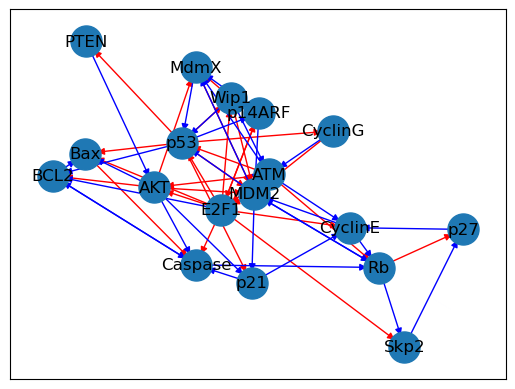

In [66]:
# Specify the edges you want here
blue_edges = [edge for edge in G.edges(data=True) if edge[2]['action'] == 'inhibits']
red_edges = [edge for edge in G.edges(data=True) if edge[2]['action']  == 'activates']
edge_colours = ['red' if edge in red_edges else 'blue'
                for edge in G.edges()]
# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=blue_edges, edge_color='b', arrows=True)
plt.show()

In [67]:
import random


def initialize_states(G):
    states = {}
    for node in G.nodes: # random float between 0 and 1
        states[node] = random.uniform(0, 1)
    return np.array(list(states.values()))

# Function to update states based on the interaction
def update_states(G, states, adj):
    new_states = adj @ states
    # >1: 1, <0: 0
    new_states = np.where(new_states > 1, 1, new_states)
    new_states = np.where(new_states < 0, 0, new_states)
    return new_states

# Function to run the simulation for a number of steps
def run_simulation(G,j, adj, steps=25):
    states = initialize_states(G)
    death_count, proliferate_count = 0,0
    #print(f"Initial states: {states}")
    for step in range(steps):
        states = update_states(G, states, adj)
       #print(f"States at step {step + 1}: {states}")
        if states[node_indices['Caspase']] >= 1:
            death_count += 1
        else:
            death_count = 0
        if states[node_indices["CyclinE"]] >= 1:
            proliferate_count += 1
        
        else:
            proliferate_count = 0
        if death_count >= 5:
            return np.array([1,0,0])
        if proliferate_count >= 10:
            return np.array([0,0,1])
    return np.array([0,1,0])

# Normal

In [68]:
sample = 2**11
temp_edges = orig_edges.copy() # Initialize
temp_edges.append(("Rb", "E2F1", {"action": "inhibits"}),)

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(temp_edges)

num_nodes = len(nodes)
state_count = np.array([0,0,0])

adj = np.zeros((num_nodes, num_nodes))

for edge in temp_edges:
    src, dest, action = edge
    action = action['action']
    src_idx = node_indices[src]
    dest_idx = node_indices[dest]
    if action == "activates":
        adj[dest_idx, src_idx] = 1
    elif action == "inhibits":
        adj[dest_idx, src_idx] = -1

for j in range(sample):
    state_count += run_simulation(G, j, adj)
print('--------------------------------------------')
print(f"Original Network")
print(state_count)
print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)

--------------------------------------------
Original Network
[   0 1642  406]
1.8017578125


# Cancer

In [69]:
sample = 2**11
temp_edges = orig_edges.copy() # Initialize

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(temp_edges)

num_nodes = len(nodes)
state_count = np.array([0,0,0])

adj = np.zeros((num_nodes, num_nodes))

for edge in temp_edges:
    src, dest, action = edge
    action = action['action']
    src_idx = node_indices[src]
    dest_idx = node_indices[dest]
    if action == "activates":
        adj[dest_idx, src_idx] = 1
    elif action == "inhibits":
        adj[dest_idx, src_idx] = -1

for j in range(sample):
    state_count += run_simulation(G, j, adj)
print('--------------------------------------------')
print(f"Original Network")
print(state_count)
print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)

--------------------------------------------
Original Network
[   0 1440  608]
1.703125


# edge removal

In [70]:
#temp_edges = orig_edges

sample = 2**11
results = []
for i in range(len(orig_edges)):
    temp_edges = orig_edges.copy() # Initialize
    
    rm_edge = temp_edges.pop(i)

    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(temp_edges)
    
    num_nodes = len(nodes)
    state_count = np.array([0,0,0])
    
    adj = np.zeros((num_nodes, num_nodes))

    for edge in temp_edges:
        src, dest, action = edge
        action = action['action']
        src_idx = node_indices[src]
        dest_idx = node_indices[dest]
        if action == "activates":
            adj[dest_idx, src_idx] = 1
        elif action == "inhibits":
            adj[dest_idx, src_idx] = -1

    for j in range(sample):
        state_count += run_simulation(G, j, adj)
    print('--------------------------------------------')
    print(f"Removed edge: {rm_edge}")
    print(state_count)
    print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)
    results.append((rm_edge[0],rm_edge[1], (state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample ))
    
=

--------------------------------------------
Removed edge: ('CyclinE', 'Rb', {'action': 'inhibits'})
[   0 1477  571]
1.72119140625
--------------------------------------------
Removed edge: ('MDM2', 'Rb', {'action': 'inhibits'})
[   0 1479  569]
1.72216796875
--------------------------------------------
Removed edge: ('Rb', 'MDM2', {'action': 'inhibits'})
[   0 1166  882]
1.5693359375
--------------------------------------------
Removed edge: ('Caspase', 'Rb', {'action': 'inhibits'})
[   0 1415  633]
1.69091796875
--------------------------------------------
Removed edge: ('E2F1', 'p14ARF', {'action': 'activates'})
[   0 1027 1021]
1.50146484375
--------------------------------------------
Removed edge: ('E2F1', 'Caspase', {'action': 'activates'})
[   0 1454  594]
1.7099609375
--------------------------------------------
Removed edge: ('p14ARF', 'MDM2', {'action': 'inhibits'})
[   0  660 1388]
1.322265625
--------------------------------------------
Removed edge: ('p14ARF', 'E2F1', {'

In [71]:
import pandas as pd
pd.DataFrame(results)[2].median()

1.708740234375

# Node Removal

In [72]:
nodes

['Rb',
 'p53',
 'ATM',
 'MDM2',
 'p21',
 'PTEN',
 'CyclinG',
 'Wip1',
 'BCL2',
 'Bax',
 'Caspase',
 'CyclinE',
 'E2F1',
 'AKT',
 'p14ARF',
 'MdmX',
 'Skp2',
 'p27']

In [73]:
#temp_edges = orig_edges
sample = 2**10
for j, rm_node in enumerate(nodes):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(temp_edges)
    
    G.remove_node(rm_node)
    
    num_nodes = len(nodes)-1
    state_count = np.array([0,0,0])
    
    adj = np.zeros((num_nodes, num_nodes))
    
    _node_indices = {node: i for i, node in enumerate(G.nodes)}

    for edge in G.edges(data=True):
        src, dest, action = edge
        action = action['action']
        src_idx = _node_indices[src]
        dest_idx = _node_indices[dest]
        if action == "activates":
            adj[dest_idx, src_idx] = 1
        elif action == "inhibits":
            adj[dest_idx, src_idx] = -1

    for j in range(sample):
        state_count += run_simulation(G, j, adj)
    print('--------------------------------------------')
    print(f"Removed node: {rm_node}")
    print(state_count)
    print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)
    

--------------------------------------------
Removed node: Rb
[392 632   0]
2.765625
--------------------------------------------
Removed node: p53
[197 827   0]
2.384765625
--------------------------------------------
Removed node: ATM
[472 552   0]
2.921875
--------------------------------------------
Removed node: MDM2
[   0 1024    0]
2.0
--------------------------------------------
Removed node: p21
[289 735   0]
2.564453125
--------------------------------------------
Removed node: PTEN
[504 520   0]
2.984375
--------------------------------------------
Removed node: CyclinG
[316 708   0]
2.6171875
--------------------------------------------
Removed node: Wip1
[  0 215 809]
1.2099609375
--------------------------------------------
Removed node: BCL2
[342 682   0]
2.66796875
--------------------------------------------
Removed node: Bax
[328 696   0]
2.640625
--------------------------------------------
Removed node: Caspase
[325 699   0]
2.634765625
-----------------------------

# Node constant activation

In [74]:
def act_simulation(G,j, adj, act_gene, _node_indices, steps=100):
    states = initialize_states(G, j)
    death_count, proliferate_count = 0,0
    #print(f"Initial states: {states}")
    for step in range(steps):
        states[_node_indices[act_gene]] = 1
        states = update_states(G, states, adj)
        states[_node_indices[act_gene]] = 1
       #print(f"States at step {step + 1}: {states}")
        if states[node_indices['Caspase']] >= 1:
            death_count += 1
        else:
            death_count = 0
        if states[node_indices["CyclinE"]] >= 1:
            proliferate_count += 1
        
        else:
            proliferate_count = 0
        if death_count >= 5:
            return np.array([1,0,0])
        if proliferate_count >= 10:
            return np.array([0,0,1])
    return np.array([0,1,0])

In [75]:
#temp_edges = orig_edges
sample = 2**8
for j, act_node in enumerate(nodes):
    
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(temp_edges)
    
    num_nodes = len(nodes)
    state_count = np.array([0,0,0])
    
    adj = np.zeros((num_nodes, num_nodes))
    
    _node_indices = {node: i for i, node in enumerate(G.nodes)}
    
    for edge in G.edges(data=True):
        src, dest, action = edge
        action = action['action']
        src_idx = _node_indices[src]
        dest_idx = _node_indices[dest]
        if action == "activates":
            adj[dest_idx, src_idx] = 1
        elif action == "inhibits":
            adj[dest_idx, src_idx] = -1
    
    for j in range(sample):
        state_count += act_simulation(G, j, adj, act_node, _node_indices)
    print('--------------------------------------------')
    print(f"Activated node: {act_node}")
    print(state_count)
    print((state_count[0]*4 + state_count[1]*2 + state_count[2]*1)/ sample)


--------------------------------------------
Activated node: Rb
[  0 256   0]
2.0
--------------------------------------------
Activated node: p53
[256   0   0]
4.0
--------------------------------------------
Activated node: ATM
[  0 256   0]
2.0
--------------------------------------------
Activated node: MDM2
[  0   0 256]
1.0
--------------------------------------------
Activated node: p21
[  0 256   0]
2.0
--------------------------------------------
Activated node: PTEN
[253   3   0]
3.9765625
--------------------------------------------
Activated node: CyclinG
[  0   0 256]
1.0
--------------------------------------------
Activated node: Wip1
[  0   0 256]
1.0
--------------------------------------------
Activated node: BCL2
[  0 176  80]
1.6875
--------------------------------------------
Activated node: Bax
[104 152   0]
2.8125
--------------------------------------------
Activated node: Caspase
[256   0   0]
4.0
--------------------------------------------
Activated node: Cyc

# Random Network

In [76]:
len(nodes), len(edges)

(18, 60)

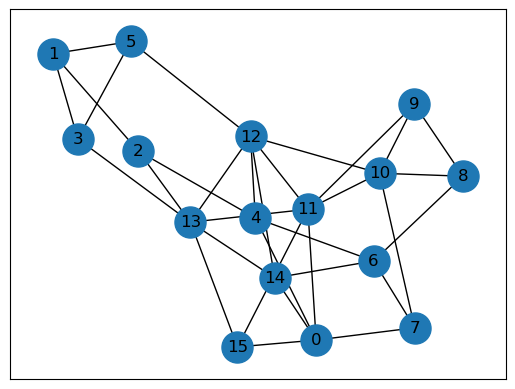

In [77]:
G = nx.watts_strogatz_graph(16, 4, 0.5)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='k', arrows=True)
plt.show()

In [78]:
G.edges(data=True)

EdgeDataView([(0, 15, {}), (0, 14, {}), (0, 11, {}), (0, 7, {}), (0, 4, {}), (1, 2, {}), (1, 3, {}), (1, 5, {}), (2, 4, {}), (2, 13, {}), (3, 5, {}), (3, 13, {}), (4, 6, {}), (4, 12, {}), (5, 12, {}), (6, 7, {}), (6, 8, {}), (6, 14, {}), (7, 10, {}), (8, 9, {}), (8, 10, {}), (9, 10, {}), (9, 11, {}), (10, 11, {}), (10, 12, {}), (11, 12, {}), (11, 13, {}), (11, 15, {}), (12, 13, {}), (12, 14, {}), (13, 14, {}), (13, 15, {})])

In [79]:
#temp_edges = orig_edges
sample = 2**10
for j, act_node in enumerate(nodes):
    
    num_nodes = len(nodes)
    G = nx.watts_strogatz_graph(num_nodes, 4, 0.5)
    state_count = np.array([0,0,0])
    
    adj = np.zeros((num_nodes, num_nodes))
    
    _node_indices = {node: i for i, node in enumerate(G.nodes)}
    
    for edge in G.edges:
        src, dest = edge
        src_idx = _node_indices[src]
        dest_idx = _node_indices[dest]
        adj[dest_idx, src_idx] = random.choice([-1,1])

    for j in range(sample):
        state_count += run_simulation(G, j, adj)
    print('--------------------------------------------')
    print(f"Random {j}")
    print(state_count)
    print((state_count[0] + state_count[1]*2 + state_count[2]*4)/ sample)

--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1024    0]
2.0
--------------------------------------------
Random 1023
[   0 1

# Actual Drug

https://www.cancer.gov/about-cancer/treatment/drugs/cyclophosphamide<br>
https://pubmed.ncbi.nlm.nih.gov/10524448/<br>

Approved Drug　<br>
Cyclophosphamide- alkylation, 分子標的薬でない　無理そう<br>
vincristine - Tubulin, 無理そう<br>
topoisomerase

https://pubmed.ncbi.nlm.nih.gov/12726865/ - RB1-E2F1 can be potential druc<br>
MDM-p53: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9010858/<br>
Mdmx-p53: 同
Bax Activation: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4752390/
AKT Deactivation: https://pubmed.ncbi.nlm.nih.gov/18694380/

# Conclusion

- まず本誌は再現性確保のために具体的なelucidationの手法を公開する必要がある。
少数のnodeのbinary networkからcancerの複雑なメカニズムを再現出来ているというのは驚くべきことであり、しかしながらedgeの重みの取得方法やそもそものネットワークの選定がどのように行われたか公表されない限り再現性が取れない。現に、p53ネットワークの再現のため本誌のfigure通りのネットワークを作成し論文通りの方法で解析を試みたが、有意な精度でのパフォーマンスは観測できなかった。
- しかしながら、booleanのシンプルなモデルにおいても、ある程度の傾向は見られた


検定方法


In [7]:
data = [1.72119140625,
1.72216796875,
1.5693359375,
1.69091796875,
1.50146484375,
1.7099609375,
1.322265625,
1.8046875,
2.0,
1.71875,
1.8154296875,
1.7998046875,
1.59130859375,
1.7021484375,
2.0,
#3.8896484375,
1.298828125,
1.99853515625,
1.71533203125,
1.6943359375,
1.69677734375,
1.70703125,
1.84814453125,
1.73095703125,
1.708984375,
1.53564453125,
1.7041015625,
1.70947265625,
1.83642578125,
1.66796875,
1.71484375,
1.37744140625,
1.7060546875,
1.71826171875,
1.70703125,
1.02392578125,
2.0,
1.00244140625,
#1.99267578125,
2.0,
1.56689453125,
1.51318359375,
#2.6865234375,
1.71435546875,
1.6865234375,
1.68505859375,
1.6826171875,
1.833984375,
1.63037109375,
1.70654296875,
1.70458984375,
1.712890625,
1.70849609375,
#3.98828125,
2.0,
1.7021484375,
1.69384765625,
1.7080078125,
#2.810546875,
1.72119140625,
1.64306640625,
1.7431640625,
1.72705078125,
1.67333984375,
1]
x1 = 1.7427
x2 = 1.6822
x3 = 1.7271

In [8]:
np.mean(data)

1.67548828125

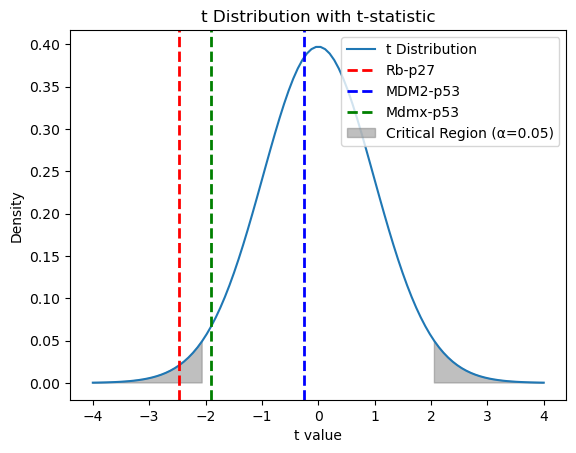

In [10]:
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# サンプルサイズと自由度
n = len(data)
df = n - 1

# t値の範囲を設定
t_values = np.linspace(-4, 4, 100)
# t分布を計算
t_dist = t.pdf(t_values, df)

# t検定の結果
t_stat1, p_value1 = ttest_1samp(data, x1, alternative='less')
t_stat2, p_value2 = ttest_1samp(data, x2, alternative='less')
t_stat3, p_value3 = ttest_1samp(data, x3, alternative='less')

# 図の作成
plt.plot(t_values, t_dist, label='t Distribution')
plt.axvline(x=t_stat1, color='red', linestyle='dashed', linewidth=2, label=f'Rb-p27')
plt.axvline(x=t_stat2, color='blue', linestyle='dashed', linewidth=2, label=f'MDM2-p53')
plt.axvline(x=t_stat3, color='green', linestyle='dashed', linewidth=2, label=f'Mdmx-p53')

plt.fill_between(t_values, t_dist, where=(t_values > t.ppf(0.975, df)) | (t_values < t.ppf(0.025, df)), color='gray', alpha=0.5, label='Critical Region (α=0.05)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.title('t Distribution with t-statistic')
plt.legend()
plt.show()


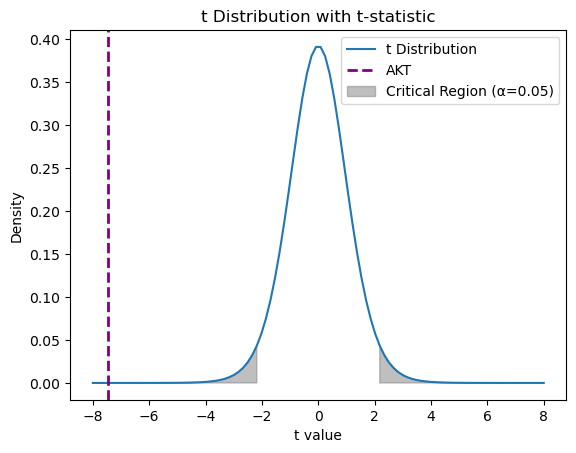

In [11]:
data = [2.384765625,2.921875, 2.0, 2.564453125, 2.984375, 2.6171875,1.2099609375, 2.66796875, 2.640625, 2.634765625,
 1.0234375,2.0, 1.4013671875, 1.9951171875, 1.6318359375, 1.7509765625
 ]
x= 3.302734375

# サンプルサイズと自由度
n = len(data)
df = n - 1

# t値の範囲を設定
t_values = np.linspace(-8, 8, 100)
# t分布を計算
t_dist = t.pdf(t_values, df)

# t検定の結果
t_stat4, p_value4 = ttest_1samp(data, x, alternative='less')

# 図の作成
plt.plot(t_values, t_dist, label='t Distribution')
plt.axvline(x=t_stat4, color='purple', linestyle='dashed', linewidth=2, label=f'AKT')

plt.fill_between(t_values, t_dist, where=(t_values > t.ppf(0.975, df)) | (t_values < t.ppf(0.025, df)), color='gray', alpha=0.5, label='Critical Region (α=0.05)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.title('t Distribution with t-statistic')
plt.legend()
plt.show()

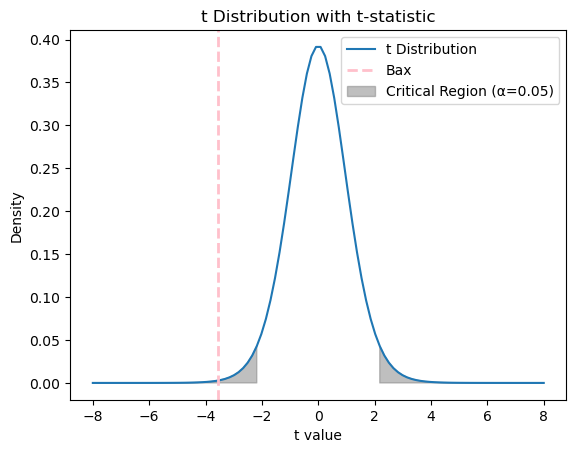

In [12]:
data = [2, 4, 2, 1, 2, 3.9765625, 1.0, 1.0, 1.6875, 4, 1, 1, 1.19140625, 1, 1.0315625, 1.7578125, 2]
x = 2.8125

# サンプルサイズと自由度
n = len(data)
df = n - 1

# t値の範囲を設定
t_values = np.linspace(-8, 8, 100)
# t分布を計算
t_dist = t.pdf(t_values, df)

# t検定の結果
t_stat5, p_value5 = ttest_1samp(data, x, alternative='greater')

# 図の作成
plt.plot(t_values, t_dist, label='t Distribution')
plt.axvline(x=t_stat5, color='pink', linestyle='dashed', linewidth=2, label=f'Bax')

plt.fill_between(t_values, t_dist, where=(t_values > t.ppf(0.975, df)) | (t_values < t.ppf(0.025, df)), color='gray', alpha=0.5, label='Critical Region (α=0.05)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.title('t Distribution with t-statistic')
plt.legend()
plt.show()

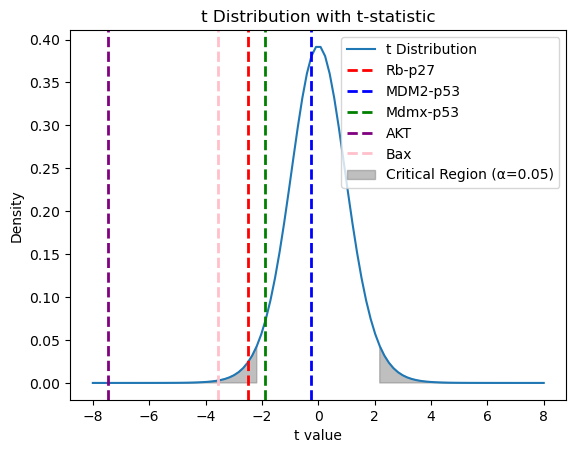

In [14]:
plt.plot(t_values, t_dist, label='t Distribution')
plt.axvline(x=t_stat1, color='red', linestyle='dashed', linewidth=2, label=f'Rb-p27')
plt.axvline(x=t_stat2, color='blue', linestyle='dashed', linewidth=2, label=f'MDM2-p53')
plt.axvline(x=t_stat3, color='green', linestyle='dashed', linewidth=2, label=f'Mdmx-p53')
plt.axvline(x=t_stat4, color='purple', linestyle='dashed', linewidth=2, label=f'AKT')
plt.axvline(x=t_stat5, color='pink', linestyle='dashed', linewidth=2, label=f'Bax')

plt.fill_between(t_values, t_dist, where= (t_values > t.ppf(0.975, df)) | (t_values < t.ppf(0.025, df)), color='gray', alpha=0.5, label='Critical Region (α=0.05)')
plt.xlabel('t value')
plt.ylabel('Density')
plt.title('t Distribution with t-statistic')
plt.legend()
plt.show()